In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data by normalization
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
1875/1875 [==============================] - 62s 32ms/step - loss: 0.1535 - accuracy: 0.9532 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 2/50
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0342 - val_accuracy: 0.9885
Epoch 3/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0385 - val_accuracy: 0.9876
Epoch 4/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 5/50
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0312 - val_accuracy: 0.9888
Epoch 6/50
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 7/50
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0310 -

313/313 [==============================] - 4s 12ms/step
Predicted: 7
True Label: 7


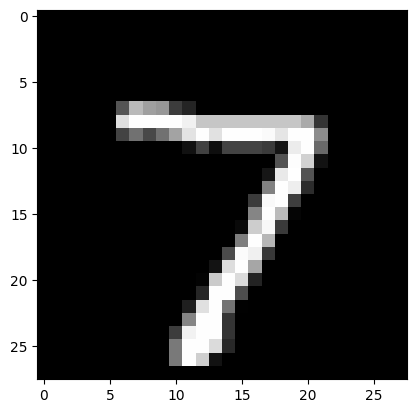


Predicted: 2
True Label: 2


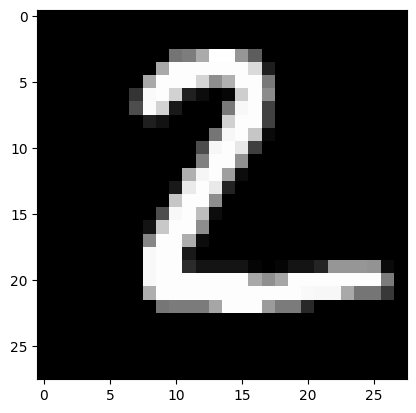


Predicted: 1
True Label: 1


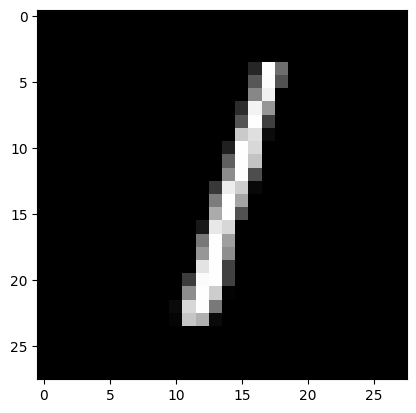


Predicted: 0
True Label: 0


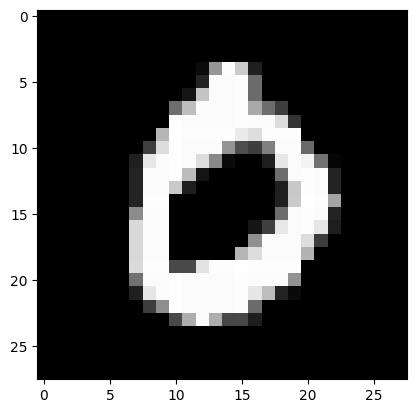


Predicted: 4
True Label: 4


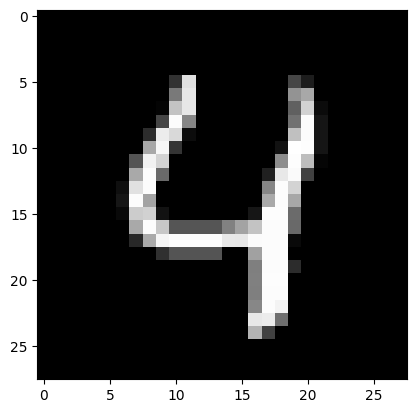


Predicted: 1
True Label: 1


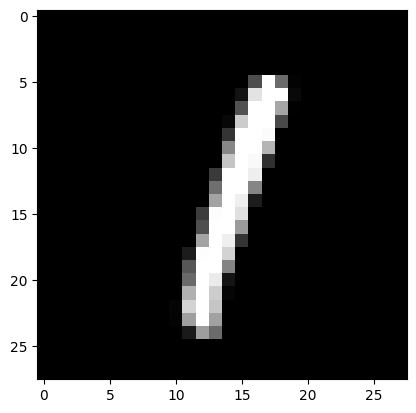


Predicted: 4
True Label: 4


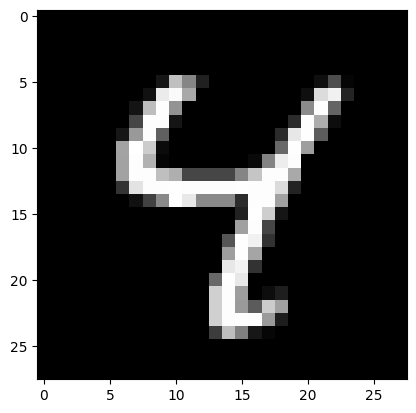


Predicted: 9
True Label: 9


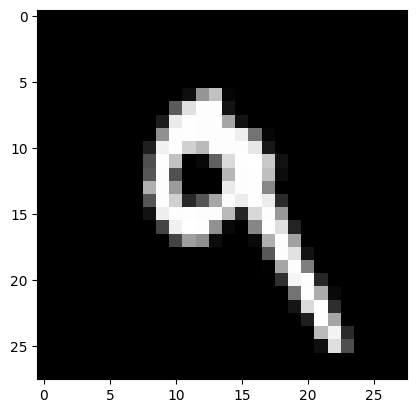


Predicted: 5
True Label: 5


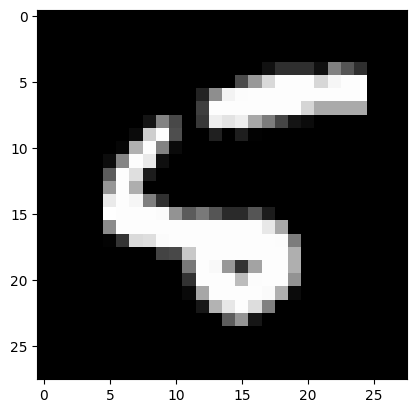


Predicted: 9
True Label: 9


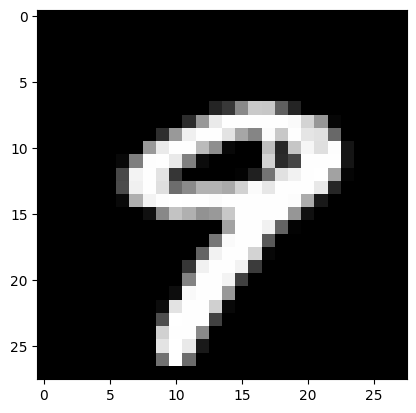

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Get the predicted digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare with the true labels
true_labels = np.argmax(y_test, axis=1)


# Print some sample predictions with images
for i in range(10):
    print("Predicted:", predicted_labels[i])
    print("True Label:", true_labels[i])
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.show()
    print()